![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Tokenización de textos  

En este taller podrán poner en práctica sus conocimientos sobre preprocesamiento de texto (tokenización). El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos detección de toxicidad en comentarios

En este taller se usará el conjunto de datos de detección de toxicidad en comentarios de la base de datos de Kaggle. Cada observación es un comentario que tiene como variable objetivo (target) la probabilidad de ser un comentario tóxico. El objetivo es predecir la toxicidad de cada comentario. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/c/jigsaw-unintended-bias-in-toxicity-classification/data).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación librerías
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import metrics
%matplotlib inline

In [3]:
# Carga de datos de archivos .csv
df = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/Toxicity.zip')
df = df[['id','comment_text', 'target']]
df.head()

,id,comment_text,target
0,6101457,What are you talking about? What group do Pete...,0.0
1,5342103,"NO!, Let him, we need a Conservative government.",0.0
2,743361,"Perhaps he took the ""power out of the Cardinal...",0.2
3,551008,"As always, yours is dripping with sarcasm, whi...",0.0
4,865998,The dirty little secret is that the price rang...,0.3


<AxesSubplot:>

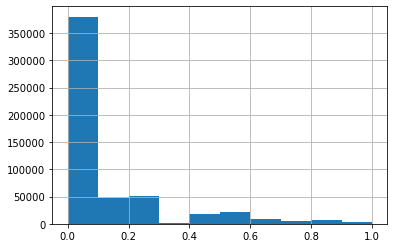

In [4]:
# Impresión histograma de variable de interés (y)
df.target.hist()

In [5]:
# Separación de variable de interés (y)
y = df.target
y.describe()

count    541462.000000
mean          0.102991
std           0.196979
min           0.000000
25%           0.000000
50%           0.000000
75%           0.166667
max           1.000000
Name: target, dtype: float64

In [6]:
# Separación de variables predictoras (X), solo se considera el texto de la noticia
X = df.comment_text

In [7]:
X

0         What are you talking about? What group do Pete...
1          NO!, Let him, we need a Conservative government.
2         Perhaps he took the "power out of the Cardinal...
3         As always, yours is dripping with sarcasm, whi...
4         The dirty little secret is that the price rang...
                                ...                        
541457    You wrote: "Both parties campaigned explicitly...
541458    Nowadays. there sure seem to be a lot of credi...
541459    We are lucky wealth filters down to the poor i...
541460    You are half right. Both nature and humans can...
541461    I don't know how you went from yelling at a fo...
Name: comment_text, Length: 541462, dtype: object

In [8]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Punto 1 - Tokenización con CountVectorizer

En la celda 1 creen y entrenen el modelo de regresión de su preferencia, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re

In [43]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did','didnt', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from', 
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're',
             's', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those', 
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves','left', 'dont', 'doesnt', 'im', 'hes', 'shes', 'isnt','wont',
                'httpscruxnowcomvaticanvaticansdepartmentculturewomengetsay','httpscruxnowcomcommentarywomenworkingaroundvaticanfacemixedbag']

# Define function to clean text
def clean_text(text):
    text = text.lower() # Convert text to lowercase
    text = re.sub(r'\d+', '', text) # Remove numbers
    text = re.sub(r'[^\w\s]', '', text) # Remove special characters
    text = ' '.join([word for word in text.split() if word not in stopwordlist]) # Remove stopwords
    return text

X_train = X_train.apply(clean_text)
X_test = X_test.apply(clean_text)

In [44]:
vectorizer = CountVectorizer(lowercase =True, token_pattern=r'\b\w+\b', stop_words='english')

train_vectors = vectorizer.fit_transform(X_train)
test_vectors = vectorizer.transform(X_test)

In [45]:
vectorizer.vocabulary_

{'oral': 129328,
 'history': 78726,
 'say': 158385,
 'nazis': 120210,
 'eugenic': 56839,
 'experiments': 58521,
 'native': 119959,
 'children': 29281,
 'mcgill': 111058,
 'knowledge': 99114,
 'government': 71027,
 'yup': 203171,
 'happened': 74822,
 'marijuana': 109528,
 'harmful': 75152,
 'human': 86206,
 'health': 76186,
 'cigarettes': 30366,
 'widely': 198038,
 'used': 190965,
 'ban': 13997,
 'reduces': 149793,
 'stress': 172895,
 'aggression': 3499,
 'level': 103224,
 'leading': 101969,
 'crime': 39158,
 'medical': 111721,
 'value': 191698,
 'favorable': 60742,
 'effects': 52833,
 'scientifically': 159423,
 'proven': 144555,
 'author': 12340,
 'consideration': 35618,
 'use': 190952,
 'legalized': 102558,
 'market': 109632,
 'transparent': 184091,
 'surely': 175125,
 'better': 17061,
 'illegal': 87948,
 'sales': 157380,
 'drug': 50544,
 'cases': 26456,
 'young': 202851,
 'adult': 2539,
 'drugs': 50588,
 'need': 120577,
 'cause': 27049,
 'problems': 142970,
 'bigger': 17490,
 'widesp

In [46]:
vectorizer = CountVectorizer(lowercase =True, token_pattern=r'\b\w+\b', stop_words='english')
train_vectors = vectorizer.fit_transform(X_train)
test_vectors = vectorizer.transform(X_test)

gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(train_vectors, y_train)
predictions = gbr.predict(test_vectors)

mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

MSE: 0.02767417044507435


In [47]:
vectorizer = CountVectorizer(lowercase =True, token_pattern=r'\b\w+\b', stop_words='english', ngram_range=(3,3))
train_vectors = vectorizer.fit_transform(X_train)
test_vectors = vectorizer.transform(X_test)

gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(train_vectors, y_train)
predictions_trigramas = gbr.predict(test_vectors)

mse_trigrama = mean_squared_error(y_test, predictions_trigramas)
print("MSE con trigramas:", mse_trigrama)

MSE con trigramas: 0.03883943237681984


In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(lowercase=True, strip_accents='unicode', stop_words='english')
train_vectors = vectorizer.fit_transform(X_train)
test_vectors = vectorizer.transform(X_test)

gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(train_vectors, y_train)
predictions_tfidf = gbr.predict(test_vectors)

mse_tfidf = mean_squared_error(y_test, predictions_tfidf)
print("MSE TF-IDF:", mse_tfidf)

MSE TF-IDF: 0.026984681536638317
